<a href="https://colab.research.google.com/github/drfperez/openair/blob/main/Air1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Import required libraries
import pandas as pd
import requests

# URL of the JSON data
url = "https://analisi.transparenciacatalunya.cat/resource/tasf-thgu.json"

# Fetch the JSON data
response = requests.get(url)
data = response.json()

# Load the data into a DataFrame
df = pd.DataFrame(data)

# Convert hourly columns (h01 to h24) to numeric
hourly_columns = [f"h{i:02d}" for i in range(1, 25)]
for col in hourly_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Add a column for the daily mean of the contaminants
df["daily_mean"] = df[hourly_columns].mean(axis=1)

# Ensure 'data' is treated as a datetime object
df["data"] = pd.to_datetime(df["data"])

# Extract the year from the 'data' column
df["year"] = df["data"].dt.year

# Group by station name, contaminant, and year, then calculate the annual mean
annual_mean = (
    df.groupby(["nom_estacio", "contaminant", "year"])["daily_mean"]
    .mean()
    .reset_index()
)

# Ensure proper data types and remove rows with missing station names
annual_mean = annual_mean.dropna(subset=["nom_estacio"])

# Display all unique station names
unique_stations = df["nom_estacio"].unique()
print("Unique Stations:")
print(unique_stations)

# Display the annual mean DataFrame
print("\nAnnual Mean of Contaminants for All Available Years:")
print(annual_mean)

# Save the annual mean results to a CSV file
annual_mean.to_csv("annual_mean_contaminants_all_years.csv", index=False)

Unique Stations:
['Martorell' 'Mollet del Vallès' 'Reus' 'Vandellòs (Barranc del Terme)'
 'Berga' 'Manlleu' 'Rubí' 'Perafort (Puigdelfí)'
 'El Prat de Llobregat (Sagnier)' 'Igualada' 'Barcelona (Ciutadella)'
 "L'Hospitalet de Llobregat" 'Vilanova i la Geltrú'
 'Vilafranca del Penedès' 'Vandellòs (Els Dedalts)'
 'Tarragona (Parc de la Ciutat)' 'Cubelles (Poliesportiu)'
 'Sant Andreu de la Barca' 'Flix'
 'El Prat de Llobregat (Jardins de la Pau)' 'Barcelona (Sants)' 'Montsec'
 'Barcelona (Parc Vall Hebron)' 'Gavà' 'Agullana' 'Sant Vicenç dels Horts'
 'Vandellòs (Viver)' 'Juneda (Pla del Molí)' 'Sant Adrià de Besòs'
 'Girona (Escola de Música)' 'Vic' 'Montseny (La Castanya)'
 'Barcelona (Poblenou)' 'Vila-seca (IES Vila-seca)' 'Sort'
 'Barcelona (Palau Reial)' 'Barcelona (Observatori Fabra)'
 'Tarragona (Universitat Laboral)' 'Tarragona (Sant Salvador)'
 'Tarragona (Bonavista)' 'Mataró' 'Tona (Zona Esportiva)' 'Santa Pau'
 'Manresa' 'Begur' 'Montcada i Reixac (Can Sant Joan)'
 'Barcelona (

Please upload your CSV file:


Saving annual_mean_contaminants_all_years.csv to annual_mean_contaminants_all_years (1).csv


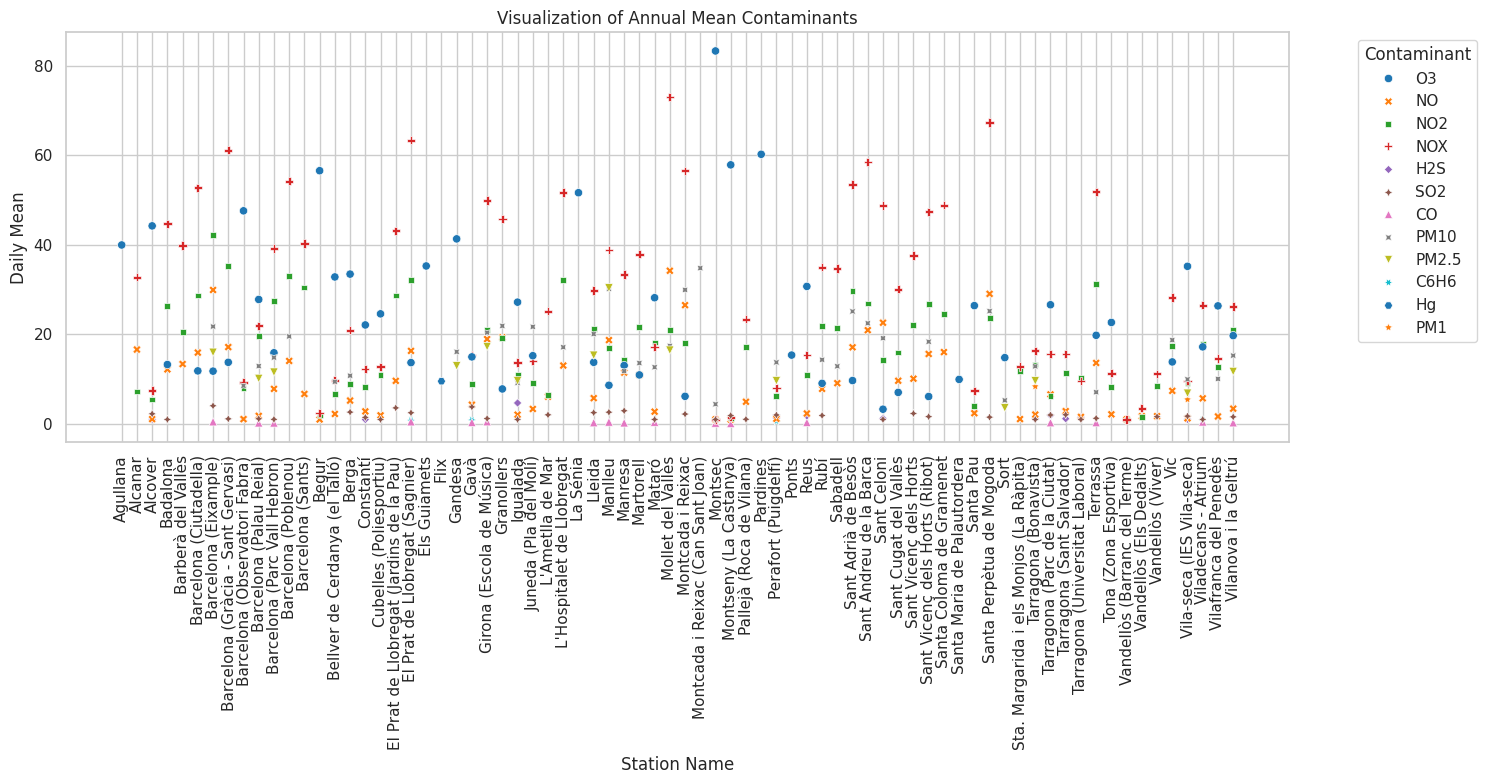

In [ ]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Step 1: Upload CSV file
print("Please upload your CSV file:")
uploaded = files.upload()

# Step 2: Load the CSV into a pandas DataFrame
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

# Step 3: Ensure data is clean (optional)
# For example, drop rows with missing daily_mean values
data = data.dropna(subset=['daily_mean'])

# Step 4: Create visualization using seaborn
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")

# Scatter plot with 'station name' on x-axis, 'daily mean' on y-axis, and color by contaminant
sns.scatterplot(
    data=data,
    x='nom_estacio',
    y='daily_mean',
    hue='contaminant',
    style='contaminant',
    palette='tab10'
)

# Customize plot
plt.xticks(rotation=90)
plt.title('Visualization of Annual Mean Contaminants')
plt.xlabel('Station Name')
plt.ylabel('Daily Mean')
plt.legend(title='Contaminant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show plot
plt.show()

Please upload your CSV file:


Saving annual_mean_contaminants_all_years.csv to annual_mean_contaminants_all_years.csv


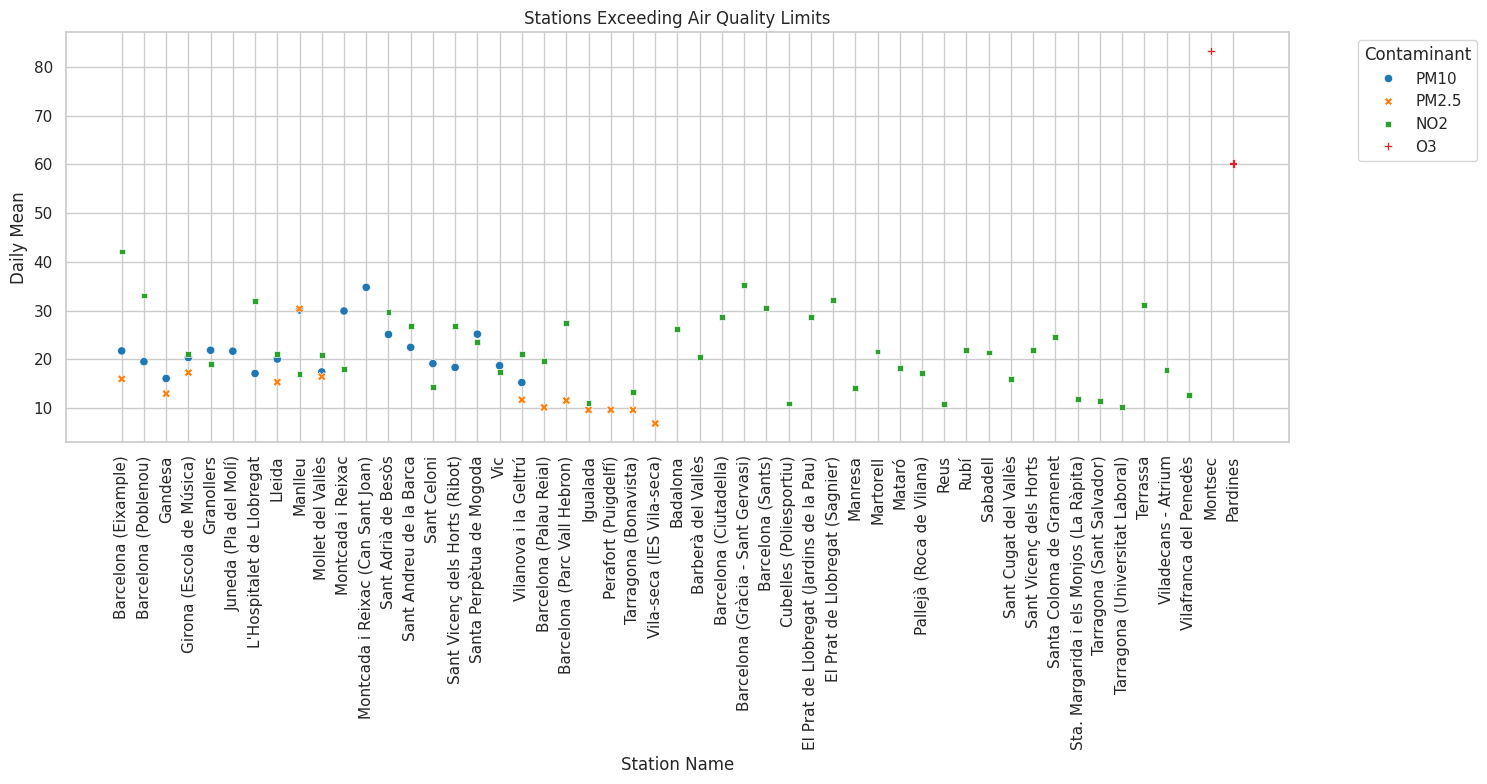

Stations exceeding air quality limits:


,nom_estacio,contaminant,year,daily_mean
26,Manlleu,PM2.5,2024,30.395833
23,Girona (Escola de Música),PM2.5,2024,17.291667
27,Mollet del Vallès,PM2.5,2024,16.479167
19,Barcelona (Eixample),PM2.5,2024,16.000000
25,Lleida,PM2.5,2024,15.347222
...,...,...,...,...
69,Tarragona (Sant Salvador),NO2,2024,11.388889
46,Igualada,NO2,2024,11.041667
41,Cubelles (Poliesportiu),NO2,2024,10.972222
56,Reus,NO2,2024,10.875000


In [ ]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Step 1: Upload CSV file
print("Please upload your CSV file:")
uploaded = files.upload()

# Step 2: Load the CSV into a pandas DataFrame
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

# Step 3: Define air quality thresholds (WHO and EU limits)
thresholds = {
    'PM10': 15,  # WHO annual mean limit for PM10 in µg/m³
    'PM2.5': 5,  # WHO annual mean limit for PM2.5 in µg/m³
    'NO2': 10,   # WHO annual mean limit for NO2 in µg/m³
    'O3': 60,    # EU target value for O3 in µg/m³ (8-hour average)
    'SO2': 20,   # WHO daily mean limit for SO2 in µg/m³
    'CO': 4,     # WHO 24-hour mean limit for CO in mg/m³ (converted to µg/m³)
}

# Step 4: Identify stations exceeding thresholds
exceeding_stations = []

for contaminant, limit in thresholds.items():
    exceed = data[(data['contaminant'] == contaminant) & (data['daily_mean'] > limit)]
    if not exceed.empty:
        exceeding_stations.append(exceed)

# Combine all exceeding stations into a single DataFrame
exceeding_data = pd.concat(exceeding_stations, ignore_index=True)

# Step 5: Visualize stations exceeding limits
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")

# Scatter plot with station names on x-axis and daily mean on y-axis
sns.scatterplot(
    data=exceeding_data,
    x='nom_estacio',
    y='daily_mean',
    hue='contaminant',
    style='contaminant',
    palette='tab10'
)

# Customize plot
plt.xticks(rotation=90)
plt.title('Stations Exceeding Air Quality Limits')
plt.xlabel('Station Name')
plt.ylabel('Daily Mean')
plt.legend(title='Contaminant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show plot
plt.show()

# Step 6: Display data of stations exceeding limits
print("Stations exceeding air quality limits:")
exceeding_data.sort_values(by=['contaminant', 'daily_mean'], ascending=False)

Please upload your CSV file:


Saving annual_mean_contaminants_all_years.csv to annual_mean_contaminants_all_years (1).csv


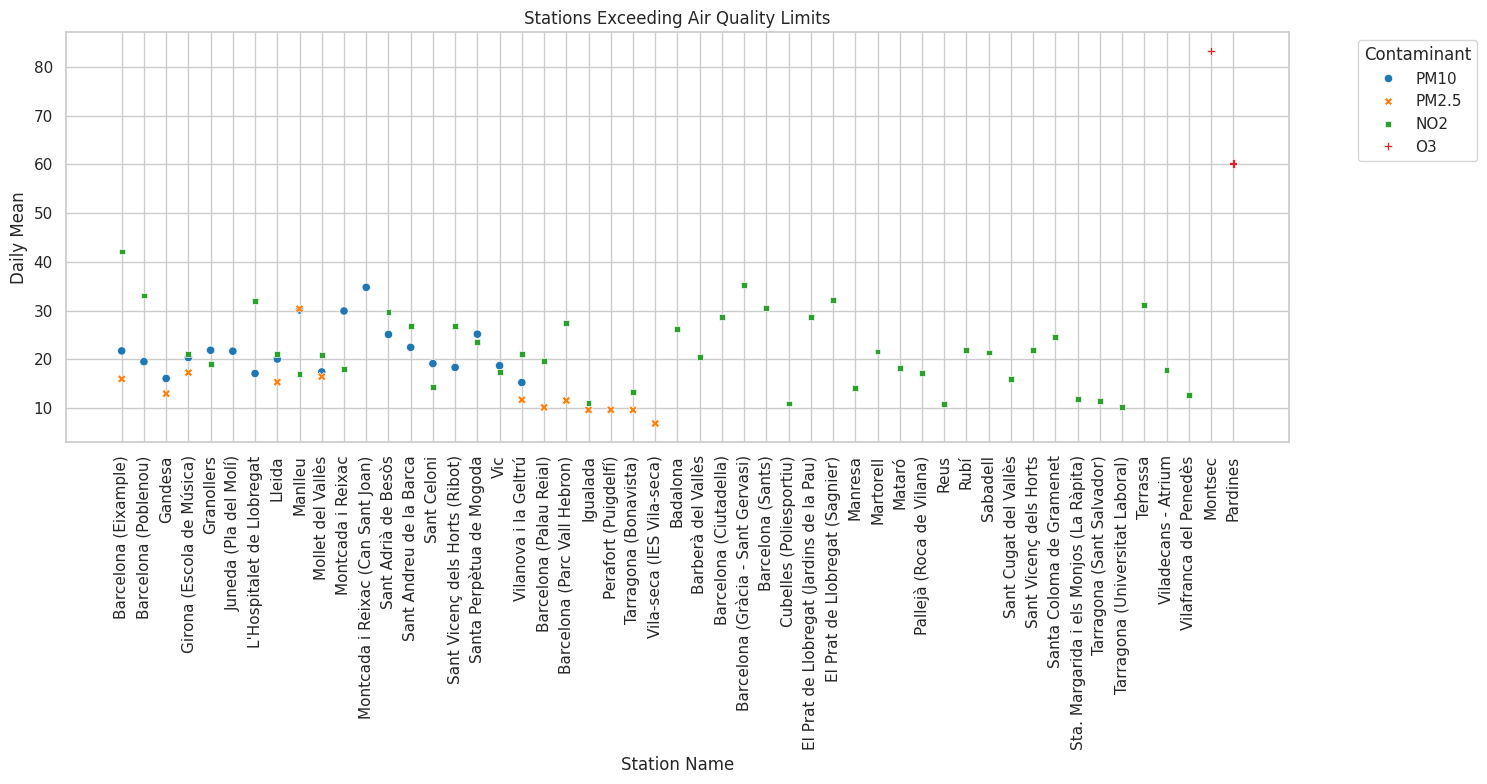

Results saved to stations_exceeding_limits.csv. You can download it below:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Step 1: Upload CSV file
print("Please upload your CSV file:")
uploaded = files.upload()

# Step 2: Load the CSV into a pandas DataFrame
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

# Step 3: Define air quality thresholds (WHO and EU limits)
thresholds = {
    'PM10': 15,  # WHO annual mean limit for PM10 in µg/m³
    'PM2.5': 5,  # WHO annual mean limit for PM2.5 in µg/m³
    'NO2': 10,   # WHO annual mean limit for NO2 in µg/m³
    'O3': 60,    # EU target value for O3 in µg/m³ (8-hour average)
    'SO2': 20,   # WHO daily mean limit for SO2 in µg/m³
    'CO': 4,     # WHO 24-hour mean limit for CO in mg/m³ (converted to µg/m³)
}

# Step 4: Identify stations exceeding thresholds
exceeding_stations = []

for contaminant, limit in thresholds.items():
    exceed = data[(data['contaminant'] == contaminant) & (data['daily_mean'] > limit)]
    if not exceed.empty:
        exceeding_stations.append(exceed)

# Combine all exceeding stations into a single DataFrame
exceeding_data = pd.concat(exceeding_stations, ignore_index=True)

# Step 5: Visualize stations exceeding limits
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")

# Scatter plot with station names on x-axis and daily mean on y-axis
sns.scatterplot(
    data=exceeding_data,
    x='nom_estacio',
    y='daily_mean',
    hue='contaminant',
    style='contaminant',
    palette='tab10'
)

# Customize plot
plt.xticks(rotation=90)
plt.title('Stations Exceeding Air Quality Limits')
plt.xlabel('Station Name')
plt.ylabel('Daily Mean')
plt.legend(title='Contaminant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show plot
plt.show()

# Step 6: Save the results to a CSV file and download it
output_file = "stations_exceeding_limits.csv"
exceeding_data.to_csv(output_file, index=False)
print(f"Results saved to {output_file}. You can download it below:")

# Download the CSV file
files.download(output_file)

In [ ]:

import pandas as pd
from google.colab import files

# Pujar el fitxer CSV
print("Carrega el teu fitxer CSV:")
uploaded = files.upload()

# Carregar el fitxer CSV
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Comprovar les columnes necessàries
required_columns = ['data', 'contaminant', 'h01', 'h02', 'h03', 'h04', 'h05', 'h06', 'h07', 'h08',
                    'h09', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19',
                    'h20', 'h21', 'h22', 'h23', 'h24']
if not all(col in df.columns for col in required_columns):
    raise ValueError("El fitxer no conté les columnes requerides.")

# Expandir les hores en files amb un format de temps
df = df.melt(id_vars=['data', 'contaminant'],
             value_vars=[f"h{i:02}" for i in range(1, 25)],
             var_name='hora',
             value_name='valor')

# Convertir la columna 'hora' en un format d'hora real
df['hora'] = df['hora'].str.extract('(\d+)').astype(int) - 1  # Convertir 'h01', 'h02', ... a 0-23
df['data'] = pd.to_datetime(df['data'], errors='coerce') + pd.to_timedelta(df['hora'], unit='h')

# Eliminar la columna 'hora' i reestructurar les dades
df = df.drop(columns=['hora'])

# Seleccionar només les columnes necessàries (data, contaminant i les hores expandides)
df = df[['data', 'contaminant', 'valor']]

# Pivotar el DataFrame per tenir una columna per cada contaminant
pivot_df = df.pivot(index='data', columns='contaminant', values='valor').reset_index()

# Ordenar per data
pivot_df = pivot_df.sort_values(by='data')

# Convertir les dates a format amb espai (en lloc de T) per ISO abans de guardar el CSV
pivot_df['data'] = pivot_df['data'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Renombrar la columna 'data' com 'date'
pivot_df = pivot_df.rename(columns={'data': 'date'})

# Convertir els noms dels contaminants a minúscules
pivot_df.columns = [col.lower() if isinstance(col, str) and col != 'date' else col for col in pivot_df.columns]

# Substituir els valors buits (NaN) per 'NA'
pivot_df = pivot_df.fillna('NA')

# Guardar el fitxer CSV processat
output_file = 'processed_data.csv'
pivot_df.to_csv(output_file, index=False)

# Descarregar el fitxer processat
files.download(output_file)
print(f"El fitxer processat s'ha desat com: {output_file}")

Carrega el teu fitxer CSV:


Saving martorell281224.csv to martorell281224.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

El fitxer processat s'ha desat com: processed_data.csv


Saving processed_data (1).csv to processed_data (1).csv

Resultats per PM10:
  Any 1991:
    Mitjana anual: nan µg/m³
    Normativa UE: No compleix
    Normativa OMS: No compleix
  Any 1992:
    Mitjana anual: nan µg/m³
    Normativa UE: No compleix
    Normativa OMS: No compleix
  Any 1993:
    Mitjana anual: nan µg/m³
    Normativa UE: No compleix
    Normativa OMS: No compleix
  Any 1994:
    Mitjana anual: nan µg/m³
    Normativa UE: No compleix
    Normativa OMS: No compleix
  Any 1995:
    Mitjana anual: nan µg/m³
    Normativa UE: No compleix
    Normativa OMS: No compleix
  Any 1996:
    Mitjana anual: nan µg/m³
    Normativa UE: No compleix
    Normativa OMS: No compleix
  Any 1997:
    Mitjana anual: nan µg/m³
    Normativa UE: No compleix
    Normativa OMS: No compleix
  Any 1998:
    Mitjana anual: nan µg/m³
    Normativa UE: No compleix
    Normativa OMS: No compleix
  Any 1999:
    Mitjana anual: nan µg/m³
    Normativa UE: No compleix
    Normativa OMS: No compleix
  Any

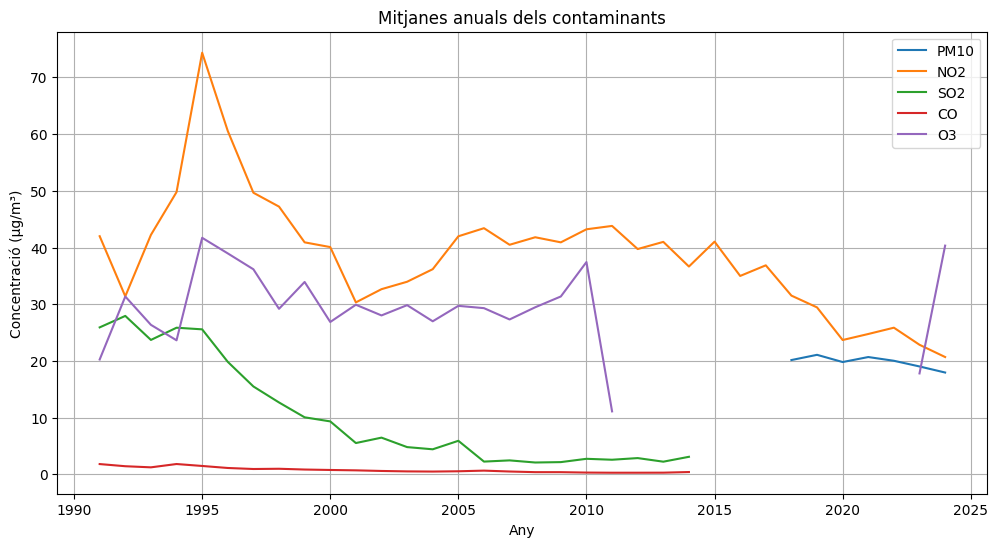

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Carregar el fitxer CSV
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename, parse_dates=['date'])

# Convertir la columna 'date' a datetime si no ho és ja
df['date'] = pd.to_datetime(df['date'])

# Calcular les mitjanes anuals per a cada contaminant
annual_means = df.groupby(df['date'].dt.year).mean()

# Definir els límits segons la normativa europea i l'OMS
eu_limits = {
    'pm10': 40,  # µg/m³
    'no2': 40,   # µg/m³
    'so2': 20,   # µg/m³
    'co': 10000, # µg/m³ (10 mg/m³)
    'o3': 120    # µg/m³ (màxim diari de les mitjanes 8h)
}

who_limits = {
    'pm10': 15,  # µg/m³
    'no2': 10,   # µg/m³
    'so2': 40,   # µg/m³ (mitjana diària)
    'co': 4000,  # µg/m³ (4 mg/m³)
    'o3': 100    # µg/m³ (màxim diari de les mitjanes 8h)
}

# Funció per comprovar el compliment de la normativa
def check_compliance(value, limit):
    return "Compleix" if value <= limit else "No compleix"

# Comprovar el compliment per a cada contaminant
for contaminant in ['pm10', 'no2', 'so2', 'co', 'o3']:
    if contaminant in annual_means.columns:
        print(f"\nResultats per {contaminant.upper()}:")
        for year, value in annual_means[contaminant].items():
            print(f"  Any {year}:")
            print(f"    Mitjana anual: {value:.2f} µg/m³")
            print(f"    Normativa UE: {check_compliance(value, eu_limits[contaminant])}")
            print(f"    Normativa OMS: {check_compliance(value, who_limits[contaminant])}")

# Càlculs addicionals per a O3 (mitjana màxima diària de 8 hores)
if 'o3' in df.columns:
    df['o3_8h_max'] = df['o3'].rolling(window=8).mean().groupby(df['date'].dt.date).max()
    o3_exceedances_eu = (df['o3_8h_max'] > eu_limits['o3']).sum()
    o3_exceedances_who = (df['o3_8h_max'] > who_limits['o3']).sum()
    print(f"\nExcedències O3 (mitjana màxima diària de 8 hores):")
    print(f"  Normativa UE (120 µg/m³): {o3_exceedances_eu} dies")
    print(f"  Normativa OMS (100 µg/m³): {o3_exceedances_who} dies")

# Gràfic de mitjanes anuals
plt.figure(figsize=(12, 6))
for contaminant in ['pm10', 'no2', 'so2', 'co', 'o3']:
    if contaminant in annual_means.columns:
        plt.plot(annual_means.index, annual_means[contaminant], label=contaminant.upper())

plt.title("Mitjanes anuals dels contaminants")
plt.xlabel("Any")
plt.ylabel("Concentració (µg/m³)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Carregar el fitxer CSV
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename, parse_dates=['date'], na_values=['NA', 'NaN'])

# Convertir la columna 'date' a datetime i afegir una columna 'day'
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Gestionar dates no vàlides
df.dropna(subset=['date'], inplace=True)  # Eliminar files amb dates no vàlides
df['day'] = df['date'].dt.date

# Convertir totes les columnes numèriques a tipus float
for col in df.columns:
    if col not in ['date', 'day']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Definir els límits diaris segons la normativa europea i l'OMS
daily_limits = {
    'eu': {'pm10': 50, 'so2': 125, 'no2': 200, 'co': 10000},  # µg/m³ (màxim diari)
    'who': {'pm10': 15, 'so2': 40, 'no2': 25, 'co': 4000}     # µg/m³ (màxim diari)
}

# Calcular les mitjanes diàries per a cada contaminant
daily_means = df.groupby('day').mean()

# Funció per calcular excedències diàries
def calculate_exceedances(data, limit):
    return (data > limit).sum()

# Verificar excedències diàries segons les normatives
for contaminant in ['pm10', 'so2', 'no2', 'co']:
    if contaminant in daily_means.columns:
        print(f"\nExcedències diàries per {contaminant.upper()}:")
        eu_exceedances = calculate_exceedances(daily_means[contaminant], daily_limits['eu'][contaminant])
        who_exceedances = calculate_exceedances(daily_means[contaminant], daily_limits['who'][contaminant])
        print(f"  Normativa UE ({daily_limits['eu'][contaminant]} µg/m³): {eu_exceedances} dies")
        print(f"  Normativa OMS ({daily_limits['who'][contaminant]} µg/m³): {who_exceedances} dies")

# Continuar amb els càlculs anuals ja implementats
annual_means = df.groupby(df['date'].dt.year).mean()

# Definir els límits anuals segons la normativa europea i l'OMS
eu_limits = {
    'pm10': 40,  # µg/m³
    'no2': 40,   # µg/m³
    'so2': 20,   # µg/m³
    'co': 10000, # µg/m³ (10 mg/m³)
    'o3': 120    # µg/m³ (màxim diari de les mitjanes 8h)
}

who_limits = {
    'pm10': 15,  # µg/m³
    'no2': 10,   # µg/m³
    'so2': 40,   # µg/m³ (mitjana diària)
    'co': 4000,  # µg/m³ (4 mg/m³)
    'o3': 100    # µg/m³ (màxim diari de les mitjanes 8h)
}

# Funció per comprovar el compliment de la normativa anual
def check_compliance(value, limit):
    return "Compleix" if value <= limit else "No compleix"

# Comprovar el compliment anual per a cada contaminant
for contaminant in ['pm10', 'no2', 'so2', 'co', 'o3']:
    if contaminant in annual_means.columns:
        print(f"\nResultats anuals per {contaminant.upper()}:")
        for year, value in annual_means[contaminant].items():
            print(f"Any {year}: Mitjana anual: {value:.2f} µg/m³")
            print(f"  Normativa UE: {check_compliance(value, eu_limits[contaminant])}")
            print(f"  Normativa OMS: {check_compliance(value, who_limits[contaminant])}")

# Càlculs addicionals per a O3 (mitjana màxima diària de 8 hores)
if 'o3' in df.columns:
    df['o3_8h_max'] = df['o3'].rolling(window=8).mean().groupby(df['date'].dt.date).max()
    o3_exceedances_eu = (df['o3_8h_max'] > eu_limits['o3']).sum()
    o3_exceedances_who = (df['o3_8h_max'] > who_limits['o3']).sum()
    print(f"\nExcedències O3 (mitjana màxima diària de 8 hores):")
    print(f"Normativa UE (120 µg/m³): {o3_exceedances_eu} dies")
    print(f"Normativa OMS (100 µg/m³): {o3_exceedances_who} dies")

# Gràfic de mitjanes anuals
plt.figure(figsize=(12, 6))
for contaminant in ['pm10', 'no2', 'so2', 'co', 'o3']:
    if contaminant in annual_means.columns:
        plt.plot(annual_means.index, annual_means[contaminant], label=contaminant.upper())

plt.title("Mitjanes anuals dels contaminants")
plt.xlabel("Any")
plt.ylabel("Concentració (µg/m³)")
plt.legend()
plt.grid(True)
plt.show()

Saving processed_dataOK.csv to processed_dataOK.csv

Excedències diàries per PM10:
  Normativa UE (50 µg/m³): 11 dies
  Normativa OMS (15 µg/m³): 1544 dies

Excedències diàries per SO2:
  Normativa UE (125 µg/m³): 0 dies
  Normativa OMS (40 µg/m³): 215 dies

Excedències diàries per NO2:
  Normativa UE (200 µg/m³): 0 dies
  Normativa OMS (25 µg/m³): 8636 dies

Excedències diàries per CO:
  Normativa UE (10000 µg/m³): 0 dies
  Normativa OMS (4000 µg/m³): 0 dies


TypeError: agg function failed [how->mean,dtype->object]

In [ ]:

import pandas as pd

# Carregar el fitxer CSV
df = pd.read_csv('processed_data (1) (3).csv', parse_dates=['date'], na_values=['NA', 'NaN'])

# Convertir la columna 'date' a datetime i eliminar files no vàlides
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.dropna(subset=['date'], inplace=True)

# Comprovar el tipus de dades i ordenar per data
print(f"Tipus de dades de 'date': {df['date'].dtype}")
df.sort_values(by='date', inplace=True)

# Eliminar duplicats en la columna 'date'
if df['date'].duplicated().any():
    print("Hi ha dates duplicades. S'estan eliminant...")
    df = df[~df['date'].duplicated()]

# Comprovar intervals de temps uniformes
df['interval'] = df['date'].diff().dt.total_seconds()
print("Intervals únics (en segons):")
print(df['interval'].value_counts())

# Completar intervals perduts (si cal)
full_time_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='H')
df = df.set_index('date').reindex(full_time_range).rename_axis('date').reset_index()

# Resultat final
print(df.head())

Tipus de dades de 'date': datetime64[ns]
Intervals únics (en segons):
interval
3600.0        281937
90000.0           28
176400.0          13
262800.0          10
522000.0           7
867600.0           1
16333200.0         1
1213200.0          1
349200.0           1
Name: count, dtype: int64
                 date   co  h2s  hcnm  hct   no   no2  nox  o3  pm10   so2  \
0 1991-11-20 00:00:00  0.2  2.0   0.2  NaN  6.0  10.0  NaN NaN   NaN  10.0   
1 1991-11-20 01:00:00  0.2  2.0   0.2  NaN  6.0  10.0  NaN NaN   NaN  10.0   
2 1991-11-20 02:00:00  0.2  2.0   0.2  NaN  6.0  10.0  NaN NaN   NaN  10.0   
3 1991-11-20 03:00:00  0.2  2.0   0.2  NaN  6.0  10.0  NaN NaN   NaN  10.0   
4 1991-11-20 04:00:00  0.2  2.0   0.2  NaN  6.0  10.0  NaN NaN   NaN  10.0   

   interval  
0       NaN  
1    3600.0  
2    3600.0  
3    3600.0  
4    3600.0  


<ipython-input-11-80b17965307f>:25: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_time_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='H')


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Carregar el fitxer CSV
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename, parse_dates=['date'], na_values=['NA', 'NaN'])

# Convertir la columna 'date' a datetime i eliminar files no vàlides
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.dropna(subset=['date'], inplace=True)

# Establir 'date' com a índex
df.set_index('date', inplace=True)

# Completar intervals de temps perduts
full_time_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')
df = df.reindex(full_time_range)

# Interpolació per omplir valors faltants
df.interpolate(method='time', inplace=True)

# Verificar intervals després d'interpolació
df['interval'] = df.index.to_series().diff().dt.total_seconds()
print("Intervals únics després d'interpolació (en segons):")
print(df['interval'].value_counts())

# Eliminar la columna 'interval' després de la verificació
df.drop(columns='interval', inplace=True)

# Resultat final
print(df.head())

# Continuar amb l'anàlisi o visualització segons sigui necessari...

Saving processed_data (1).csv to processed_data (1) (3).csv


<ipython-input-8-c77148b59b84>:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_time_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')


Intervals únics després d'interpolació (en segons):
interval
3600.0    290231
Name: count, dtype: int64
                      co  h2s  hcnm  hct   no   no2  nox  o3  pm10   so2
1991-11-20 00:00:00  0.2  2.0   0.2  NaN  6.0  10.0  NaN NaN   NaN  10.0
1991-11-20 01:00:00  0.2  2.0   0.2  NaN  6.0  10.0  NaN NaN   NaN  10.0
1991-11-20 02:00:00  0.2  2.0   0.2  NaN  6.0  10.0  NaN NaN   NaN  10.0
1991-11-20 03:00:00  0.2  2.0   0.2  NaN  6.0  10.0  NaN NaN   NaN  10.0
1991-11-20 04:00:00  0.2  2.0   0.2  NaN  6.0  10.0  NaN NaN   NaN  10.0


In [ ]:

import pandas as pd
from google.colab import files

def calcular_mitjanes(df):
    # Convertir la columna 'date' a format datetime
    df['date'] = pd.to_datetime(df['date'])

    # Calcular mitjanes diàries (format wide)
    mitjanes_diaries_wide = df.resample('D', on='date').mean().round(1).reset_index()

    # Calcular mitjanes anuals (format wide)
    mitjanes_anuals_wide = df.resample('Y', on='date').mean().round(1).reset_index()

    # Transformar a format long (pivotar)
    mitjanes_diaries_long = mitjanes_diaries_wide.melt(
        id_vars=['date'], var_name='pollutant', value_name='value'
    )

    mitjanes_anuals_long = mitjanes_anuals_wide.melt(
        id_vars=['date'], var_name='pollutant', value_name='value'
    )

    return mitjanes_diaries_wide, mitjanes_diaries_long, mitjanes_anuals_wide, mitjanes_anuals_long

# Pas 1: Pujar el fitxer CSV
print("Puja el fitxer 'dades.csv'")
uploaded = files.upload()

if 'dades.csv' in uploaded:
    print("Fitxer 'dades.csv' carregat correctament.")
    # Llegir el fitxer
    df = pd.read_csv('dades.csv')

    # Pas 2: Calcular les mitjanes
    mitjanes_diaries_wide, mitjanes_diaries_long, mitjanes_anuals_wide, mitjanes_anuals_long = calcular_mitjanes(df)

    # Pas 3: Guardar els resultats com a nous fitxers CSV
    mitjanes_diaries_wide.to_csv('mitjanes_diaries_wide.csv', index=False)
    mitjanes_diaries_long.to_csv('mitjanes_diaries_long.csv', index=False)
    mitjanes_anuals_wide.to_csv('mitjanes_anuals_wide.csv', index=False)
    mitjanes_anuals_long.to_csv('mitjanes_anuals_long.csv', index=False)

    # Descarregar fitxers al client
    print("Descarregant fitxers resultants...")
    files.download('mitjanes_diaries_wide.csv')
    files.download('mitjanes_diaries_long.csv')
    files.download('mitjanes_anuals_wide.csv')
    files.download('mitjanes_anuals_long.csv')

    print("Càlcul complet. Fitxers descarregats.")
else:
    print("El fitxer 'dades.csv' no s'ha carregat. Torna-ho a intentar.")

Puja el fitxer 'dades.csv'


Saving dades.csv to dades.csv
Fitxer 'dades.csv' carregat correctament.


<ipython-input-1-fec69bdc3726>:12: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  mitjanes_anuals_wide = df.resample('Y', on='date').mean().round(1).reset_index()


Descarregant fitxers resultants...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Càlcul complet. Fitxers descarregats.


In [ ]:

import pandas as pd
from google.colab import files

def calcular_mitjanes(df):
    # Convertir la columna 'date' a format datetime
    df['date'] = pd.to_datetime(df['date'])

    # Substituir els valors buits per NA (si cal)
    df = df.replace("", pd.NA)

    # Calcular mitjanes diàries (format wide)
    mitjanes_diaries_wide = df.resample('D', on='date').mean().round(1).reset_index()

    # Calcular mitjanes anuals (format wide)
    mitjanes_anuals_wide = df.resample('Y', on='date').mean().round(1).reset_index()

    # Transformar a format long (pivotar)
    mitjanes_diaries_long = mitjanes_diaries_wide.melt(
        id_vars=['date'], var_name='pollutant', value_name='value'
    )

    mitjanes_anuals_long = mitjanes_anuals_wide.melt(
        id_vars=['date'], var_name='pollutant', value_name='value'
    )

    return mitjanes_diaries_wide, mitjanes_diaries_long, mitjanes_anuals_wide, mitjanes_anuals_long

# Pas 1: Pujar el fitxer CSV
print("Puja el fitxer 'dades.csv'")
uploaded = files.upload()

if 'dades.csv' in uploaded:
    print("Fitxer 'dades.csv' carregat correctament.")
    # Llegir el fitxer
    df = pd.read_csv('dades.csv')

    # Pas 2: Calcular les mitjanes
    mitjanes_diaries_wide, mitjanes_diaries_long, mitjanes_anuals_wide, mitjanes_anuals_long = calcular_mitjanes(df)

    # Pas 3: Guardar els resultats com a nous fitxers CSV
    mitjanes_diaries_wide.to_csv('mitjanes_diaries_wide.csv', index=False)
    mitjanes_diaries_long.to_csv('mitjanes_diaries_long.csv', index=False)
    mitjanes_anuals_wide.to_csv('mitjanes_anuals_wide.csv', index=False)
    mitjanes_anuals_long.to_csv('mitjanes_anuals_long.csv', index=False)

    # Descarregar fitxers al client
    print("Descarregant fitxers resultants...")
    files.download('mitjanes_diaries_wide.csv')
    files.download('mitjanes_diaries_long.csv')
    files.download('mitjanes_anuals_wide.csv')
    files.download('mitjanes_anuals_long.csv')

    print("Càlcul complet. Fitxers descarregats.")
else:
    print("El fitxer 'dades.csv' no s'ha carregat. Torna-ho a intentar.")

Puja el fitxer 'dades.csv'


Saving dades.csv to dades.csv
Fitxer 'dades.csv' carregat correctament.


<ipython-input-4-276875ad7791>:15: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  mitjanes_anuals_wide = df.resample('Y', on='date').mean().round(1).reset_index()


Descarregant fitxers resultants...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Càlcul complet. Fitxers descarregats.


In [ ]:

import pandas as pd
import plotly.express as px

# Carregar les dades des del fitxer CSV
df = pd.read_csv('dades.csv')

# Convertir la columna 'date' a format datetime (ISO format)
df['date'] = pd.to_datetime(df['date'])

# Afegir la columna 'year' abans de fer el melt
df['year'] = df['date'].dt.year

# Transformar les dades a format llarg (melt) per obtenir cada contaminant en una fila
df_long = df.melt(id_vars=['date', 'year'], var_name='pollutant', value_name='value')

# Crear el gràfic animat amb Plotly
fig = px.line(df_long,
              x="date",           # Data a l'eix X
              y="value",          # Nivells de contaminació a l'eix Y
              color="pollutant",  # Diferents contaminants com a colors
              animation_frame="year",  # Anima per cada any
              animation_group="pollutant", # Grup per contaminant
              title="Evolució dels contaminants per any",
              labels={"date": "Data", "value": "Nivell de contaminació", "pollutant": "Contaminant"})

# Mostrar el gràfic
fig.show()

Buffered data was truncated after reaching the output size limit.

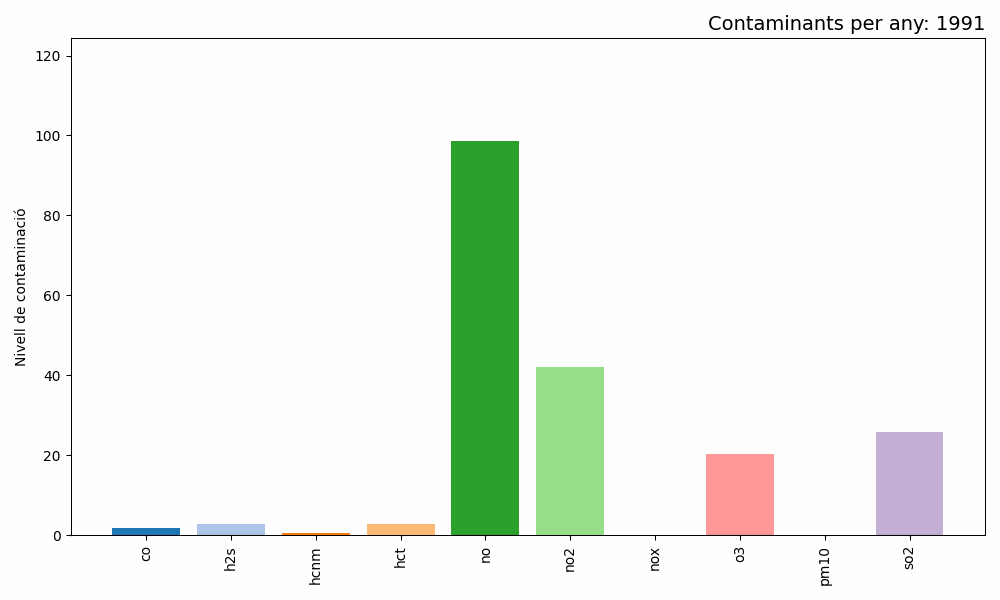

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from PIL import Image  # Pillow per crear el GIF
import os

# Carregar les dades des de fitxer local
url = '/content/anysok.csv'
df = pd.read_csv(url)

# Conversió i preprocessament
df['date'] = pd.to_datetime(df['date'], format='%Y')
df = df.fillna(0)

# Crear carpeta per guardar frames
os.makedirs('frames', exist_ok=True)

# Determinar els límits màxims de l'eix Y
max_pollutant_value = df.iloc[:, 1:].max().max()  # Valor màxim global de tots els contaminants

# Assignar colors únics a cada contaminant
colors = cm.tab20.colors  # Colormap amb 20 colors
pollutants = df.columns[1:]
pollutant_colors = {pollutant: colors[i % len(colors)] for i, pollutant in enumerate(pollutants)}

# Funció per crear cada gràfic per any
def create_bar_plot(year):
    data = df[df['date'].dt.year == year]
    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    values = data[pollutants].values.flatten()
    ax.bar(pollutants, values, color=[pollutant_colors[p] for p in pollutants])
    plt.ylim(0, max_pollutant_value)  # Escala uniforme
    plt.title(f"Contaminants per any: {year}", loc="right", fontsize=14)
    plt.ylabel('Nivell de contaminació')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig(f"frames/frame_{year}.png")
    plt.close()

# Crear els gràfics per cada any
for year in df['date'].dt.year.unique():
    create_bar_plot(year)

# Crear l'animació GIF
frames = [Image.open(f"frames/frame_{year}.png") for year in df['date'].dt.year.unique()]
gif_filename = '/content/contaminants_animation.gif'

# Guardar el GIF amb Pillow
frames[0].save(
    gif_filename,
    save_all=True,
    append_images=frames[1:],  # Afegeix totes les imatges
    duration=1500,  # Duració per frame (1.5 segons = 1500 ms)
    loop=0  # Loop infinit
)

# Mostrar el GIF
from IPython.display import Image as IPImage, display
display(IPImage(gif_filename))

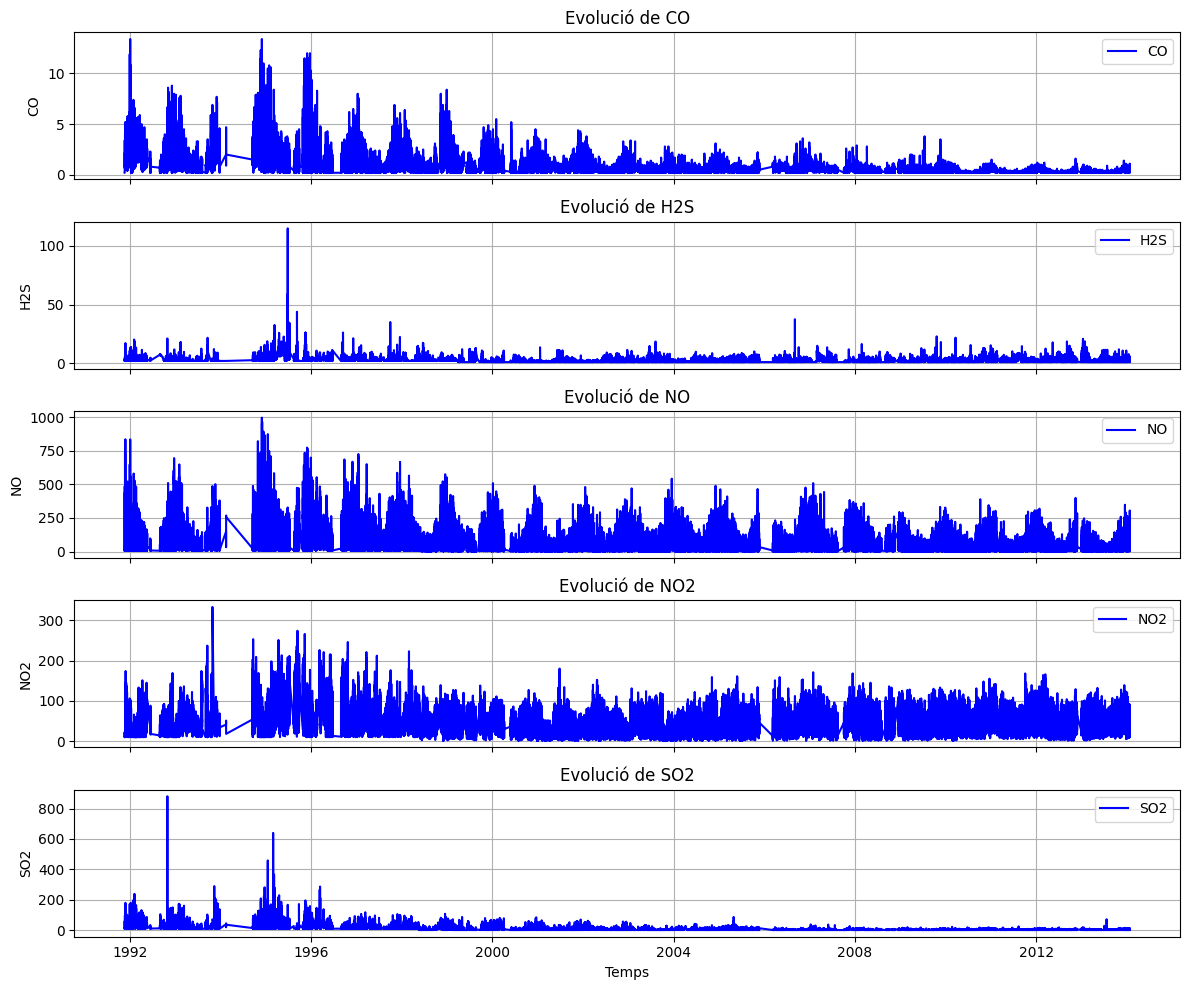

In [4]:

import pandas as pd
import matplotlib.pyplot as plt

# Carregar el fitxer CSV
data = pd.read_csv('dades.csv', parse_dates=['date'])

# Seleccionar només les columnes rellevants i eliminar valors nuls
pollutants = ['co', 'h2s', 'no', 'no2', 'so2']
data = data[['date'] + pollutants].dropna()

# Configurar el gràfic amb subgràfics
fig, axes = plt.subplots(len(pollutants), 1, figsize=(12, 10), sharex=True)
axes = axes.flatten()

# Crear els subgràfics per a cada contaminant
for i, pollutant in enumerate(pollutants):
    axes[i].plot(data['date'], data[pollutant], label=pollutant.upper(), color='blue')
    axes[i].set_title(f'Evolució de {pollutant.upper()}')
    axes[i].set_ylabel(pollutant.upper())
    axes[i].grid(True)
    axes[i].legend(loc='upper right')

# Configurar l'etiqueta de l'eix X només per l'últim subgràfic
axes[-1].set_xlabel('Temps')

# Ajustar espais entre subgràfics
fig.tight_layout()

# Mostrar el gràfic
plt.show()